# Student Performance Indicator

# Life cycle of Machine learning Project

Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("stud.csv")
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
334,female,group C,bachelor's degree,standard,none,83,93,95
710,male,group C,some college,standard,completed,93,84,90
526,male,group C,some high school,free/reduced,completed,56,61,60
66,male,group D,some high school,free/reduced,none,45,37,37
715,female,group B,associate's degree,free/reduced,completed,76,94,87


In [6]:
df.shape

(1000, 8)

In [7]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

#  Data Checks to perform

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique().sort_values(ascending = False)

math_score                     81
writing_score                  77
reading_score                  72
parental_level_of_education     6
race_ethnicity                  5
gender                          2
lunch                           2
test_preparation_course         2
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.dtypes


gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# insight
    - data is not having any null values
    - data is not contain any null values
    - the stastistics values near to each other values such as mean,median,variance,std which 
      simply says that data has less outliers.
    - dataset contain 1000 rows and 8 columns

In [14]:
print(df['gender'].unique())
print(df['race_ethnicity'].unique())
print(df['parental_level_of_education'].unique())
print(df['lunch'].unique())
print(df['test_preparation_course'].unique())


['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [15]:
# numerical & categolumns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print(len(numeric_features), numeric_features)
print(len(categorical_features), categorical_features)

3 ['math_score', 'reading_score', 'writing_score']
5 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [16]:
# define numerical & categorical columns
for features in df.columns:
    if df[features].dtypes != 'O':
        print(features,'------> is a numerical-column')
    else:
        print(features,'---->is a categorical-column')

gender ---->is a categorical-column
race_ethnicity ---->is a categorical-column
parental_level_of_education ---->is a categorical-column
lunch ---->is a categorical-column
test_preparation_course ---->is a categorical-column
math_score ------> is a numerical-column
reading_score ------> is a numerical-column
writing_score ------> is a numerical-column


# Adding columns for "Total Score" and "Average"

In [17]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['avg_score'] = df['total_score']/3

df.head(2)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [18]:
# find the number of students who scored full marks in each subjects.

print(df[df['math_score'] == 100]['avg_score'].count())

print(df[df['reading_score'] == 100]['avg_score'].count())

print(df[df['writing_score'] == 100]['avg_score'].count())

7
17
14


# Insights
    - min number of students obtain full marks in math_score,
    - max number of students obtain full marks in reading_score. 

In [19]:
# find the number of students who scored less than 20 marks in each subjects.

print(df[df['math_score'] <= 20]['avg_score'].count())

print(df[df['reading_score'] <= 20]['avg_score'].count())

print(df[df['writing_score'] <= 20]['avg_score'].count())

4
1
3


From above values we get students have performed the worst in Maths

student performed well in reading section

# Exploring Data ( Visualization )

# using histplot and kde plot

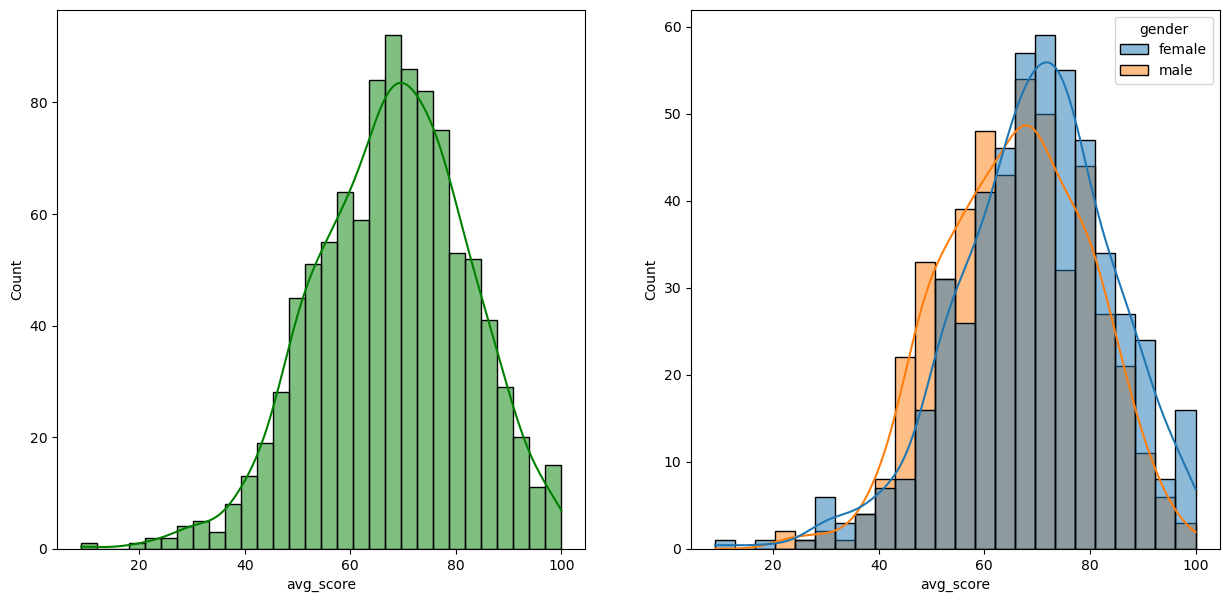

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='avg_score',bins=30,kde=True,color='g')


plt.subplot(122)
sns.histplot(data=df,x='avg_score',kde=True,hue='gender')
plt.show()

# Insight
    - females are performed well as compared to male.

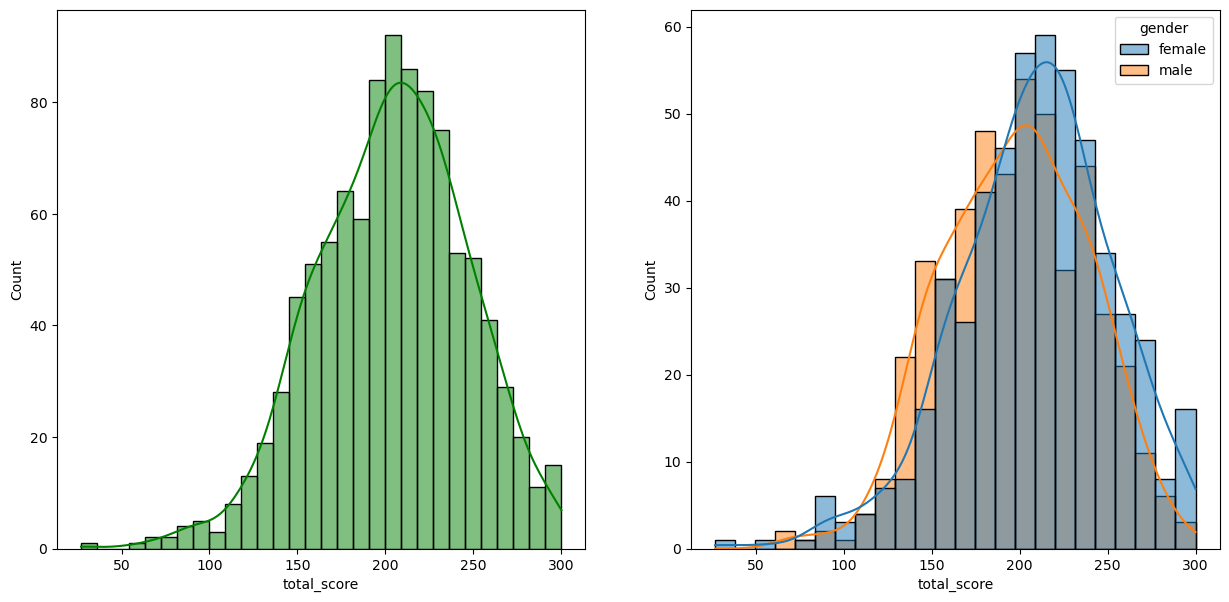

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

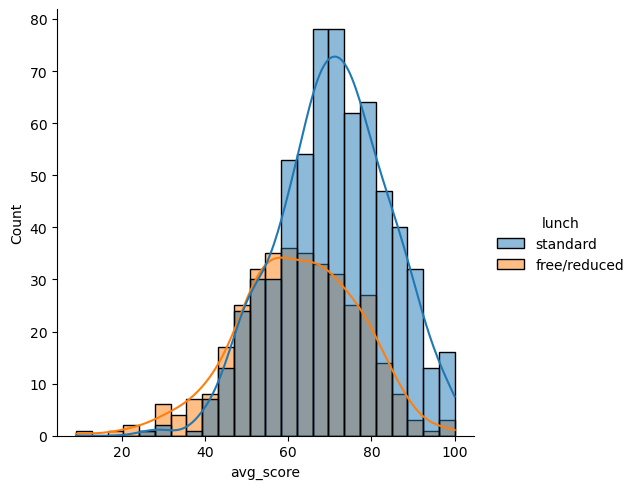

In [22]:
sns.displot(data = df, x = 'avg_score',kde = True,hue = 'lunch', kind = 'hist')

# Insight
   - lunch is not affect on female performance but it affects on male performance.
   

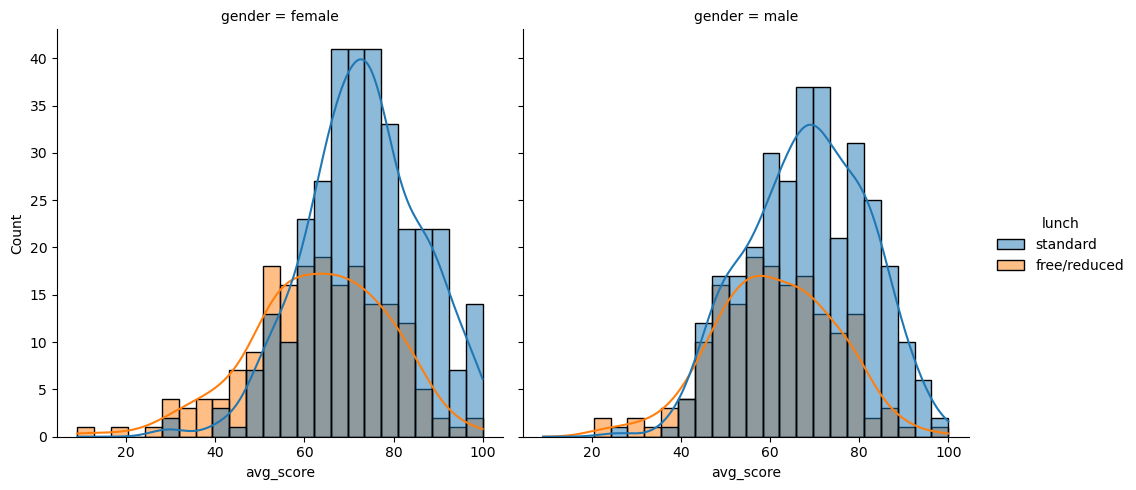

In [23]:
sns.displot(data = df,x = 'avg_score',kind = 'hist',hue = 'lunch',kde = True,col = 'gender')

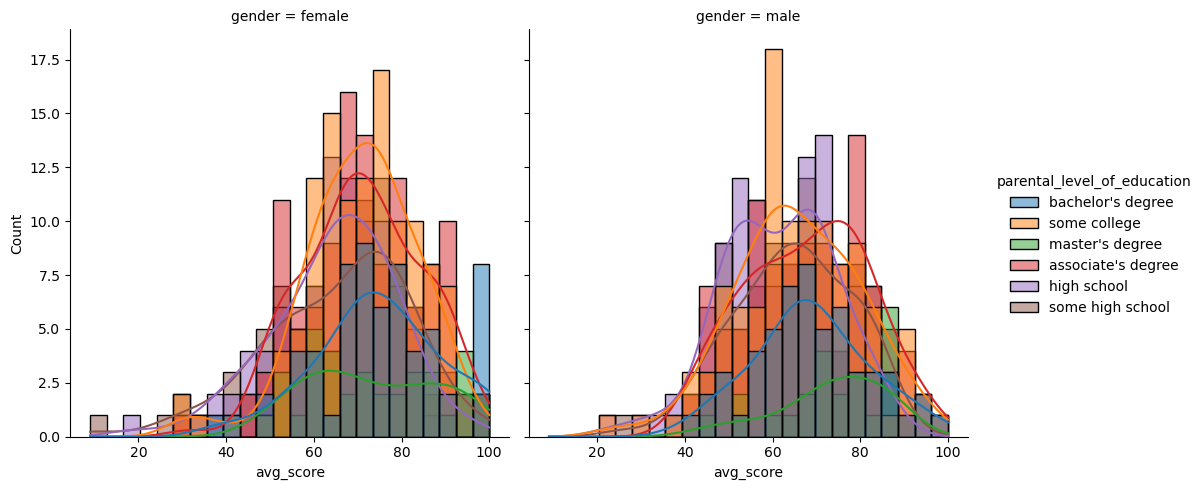

In [24]:
sns.displot(data = df,x = 'avg_score',kind = 'hist',kde = True,hue = 'parental_level_of_education',col = 'gender')

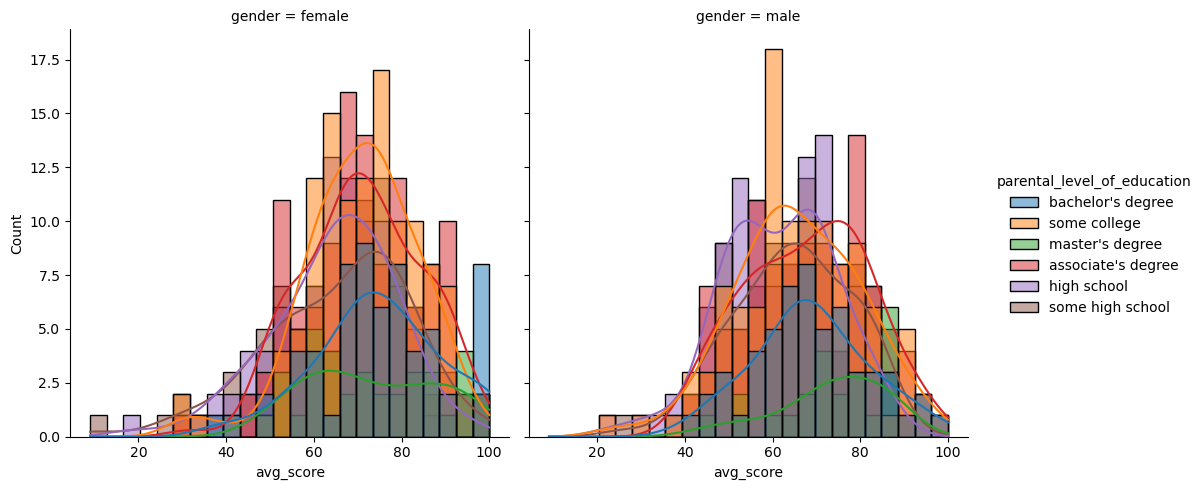

In [25]:
sns.displot(data = df,x = 'avg_score',kde = True,hue = 'parental_level_of_education',col = 'gender')

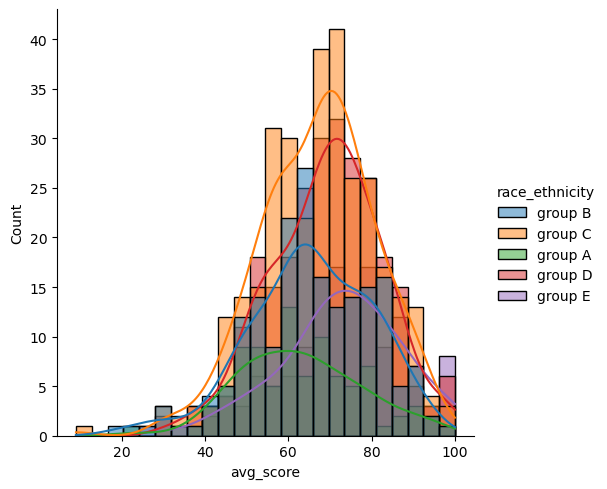

In [26]:
sns.displot(data = df,x = 'avg_score',kind = 'hist',kde = True,hue = 'race_ethnicity')

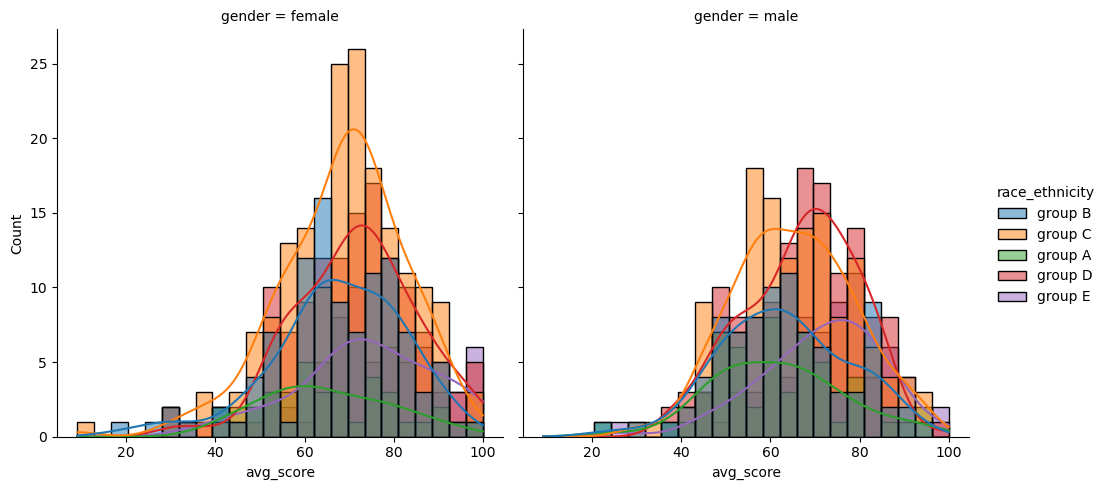

In [27]:
sns.displot(data = df,x = 'avg_score',kde = True,hue = 'race_ethnicity',col = 'gender')

<Axes: xlabel='avg_score', ylabel='Count'>

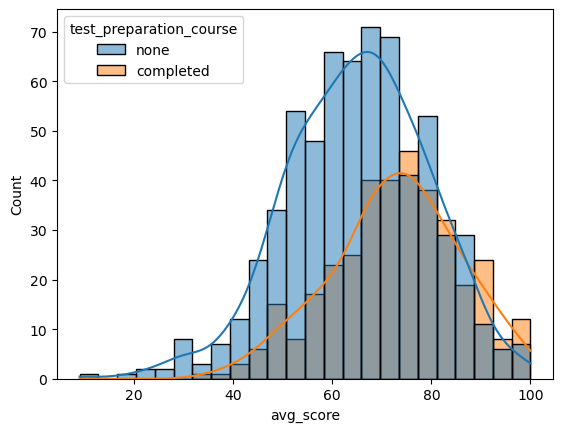

In [28]:
sns.histplot(data = df,x = 'avg_score',kde = True,hue = 'test_preparation_course')

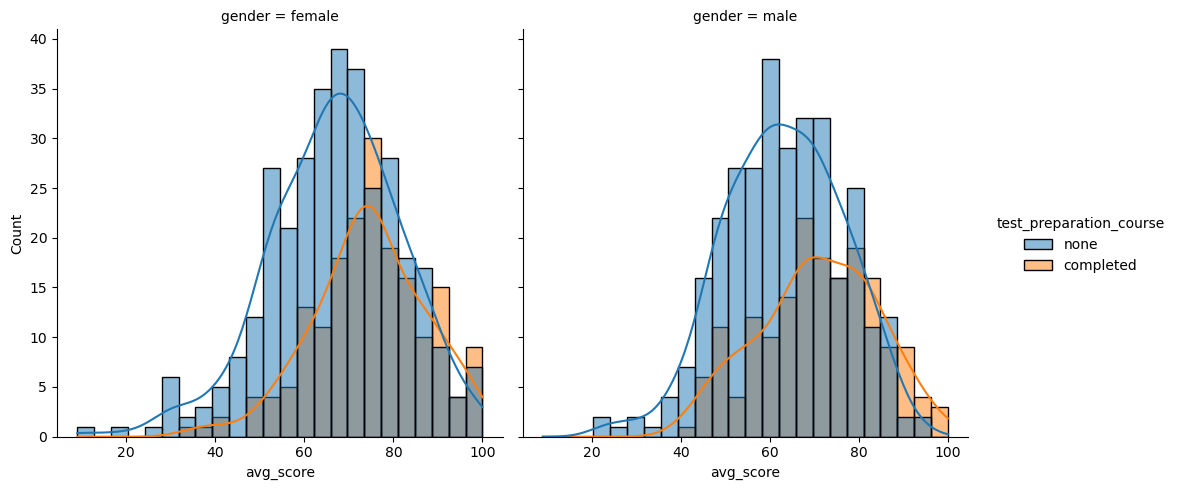

In [29]:
sns.displot(data = df,x = 'avg_score',kde = True,hue = 'test_preparation_course',col = 'gender')

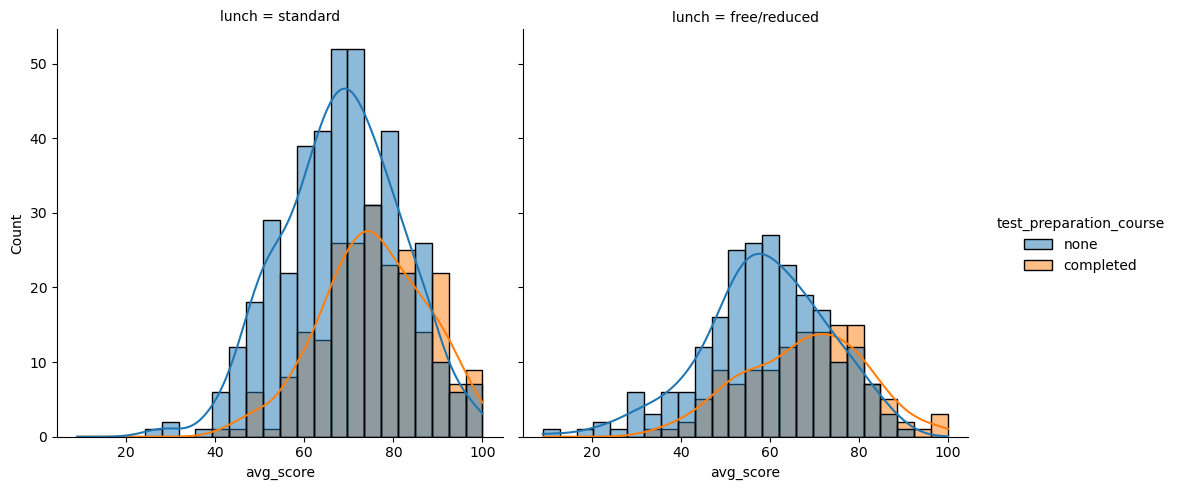

In [30]:
sns.displot(data = df,x = 'avg_score',kde = True,hue = 'test_preparation_course',col = 'lunch')

 # Maximumum score of students in all three subjects

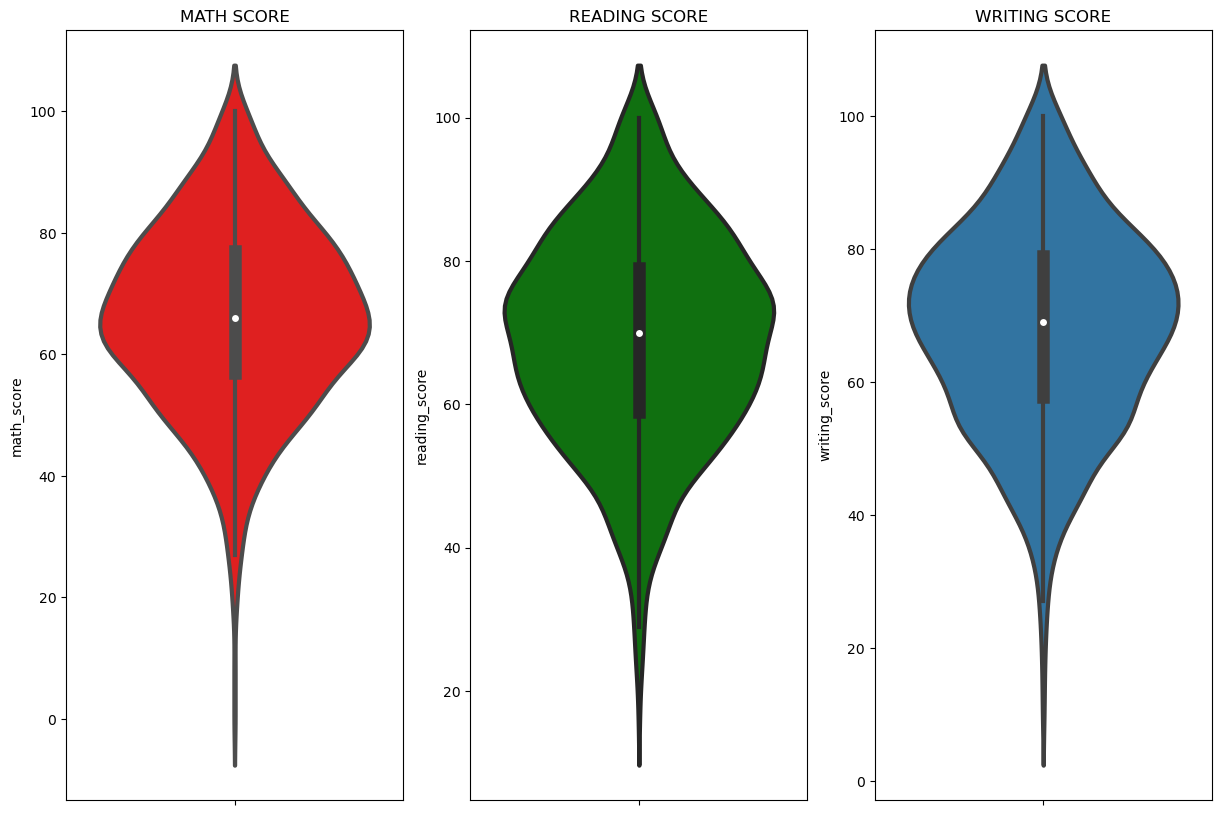

In [31]:
plt.figure(figsize = (20,10))
plt.subplot(1 ,4 , 1)
plt.title('MATH SCORE')
sns.violinplot(data = df,y= 'math_score',color = 'red',linewidth = 3)

plt.subplot(1 , 4 , 2)
plt.title('READING SCORE')
sns.violinplot(data = df,y= 'reading_score',color = 'g',linewidth = 3)

plt.subplot(1 , 4 , 3)
plt.title('WRITING SCORE')
sns.violinplot(data = df,y= 'writing_score',linewidth = 3)
plt.show()

# Multivariate analysis using pieplot

(-1.25, 1.25, -1.25, 1.25)

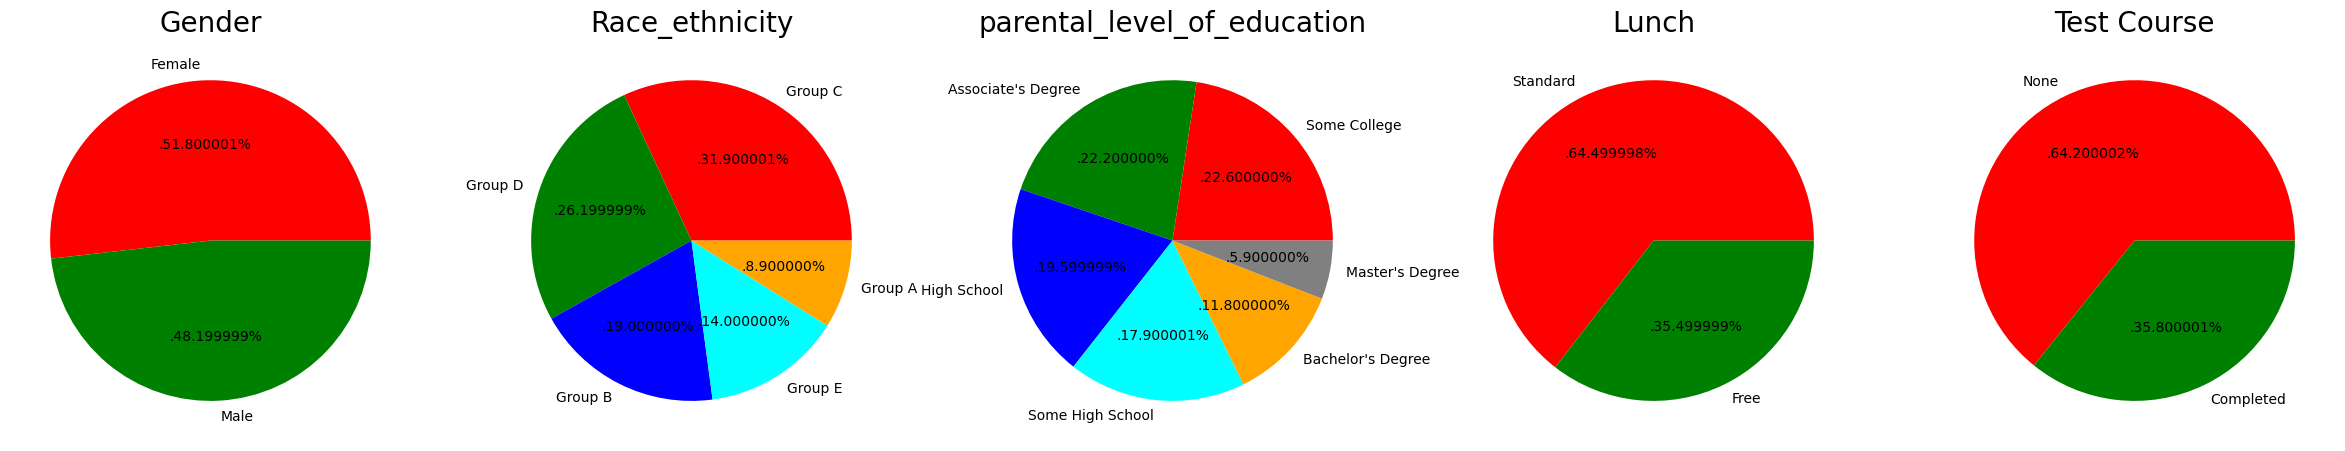

In [32]:
plt.figure(figsize = (30,12))

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size,colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Gender',fontsize = 20)
plt.axis('off')


plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels =  'Group C', 'Group D','Group B','Group E','Group A'
color = ['red','green','blue','cyan','orange']

plt.pie(size,colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_ethnicity',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['parental_level_of_education'].value_counts()
labels ='Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red','green','blue','cyan','orange','grey']

plt.pie(size,colors = color, labels = labels,autopct = '.%2f%%')
plt.title('parental_level_of_education',fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

# Insights


# Feature/column Wise Visualization

GENDER COLUMN

# Univariant Analysis

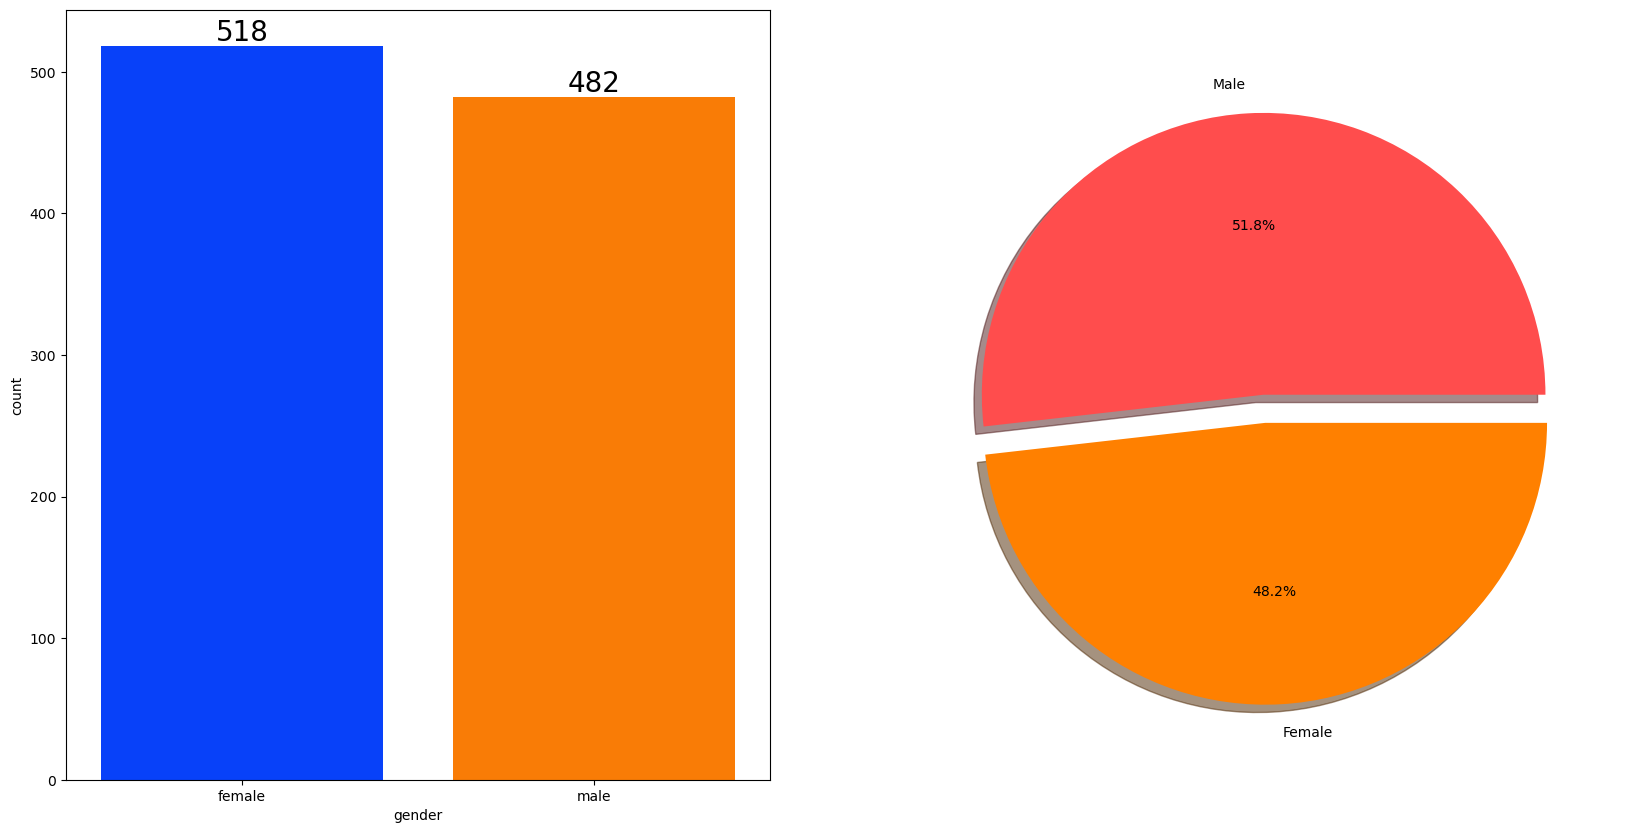

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

# Insights

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

# BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [34]:
gender_group = df.groupby('gender').mean()
gender_group

C:\Users\NADIR\AppData\Local\Temp\ipykernel_15056\3006147241.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_group = df.groupby('gender').mean()


,math_score,reading_score,writing_score,total_score,avg_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


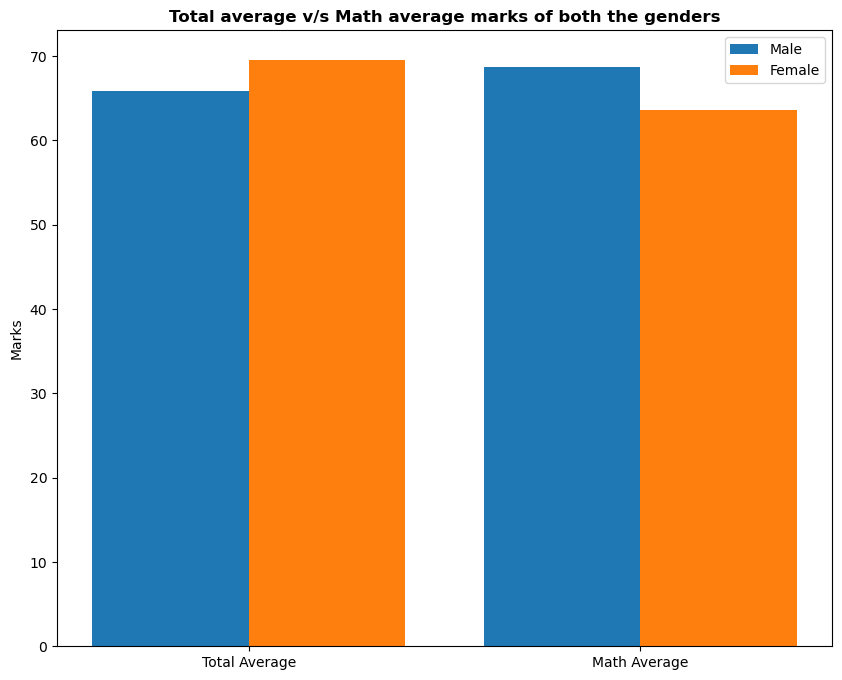

In [35]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['avg_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['avg_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()



# Insights

-    On an average females have a better overall score than men.
-    whereas males have scored higher in Maths.

# race_ethnicity

# Univariant Analysis

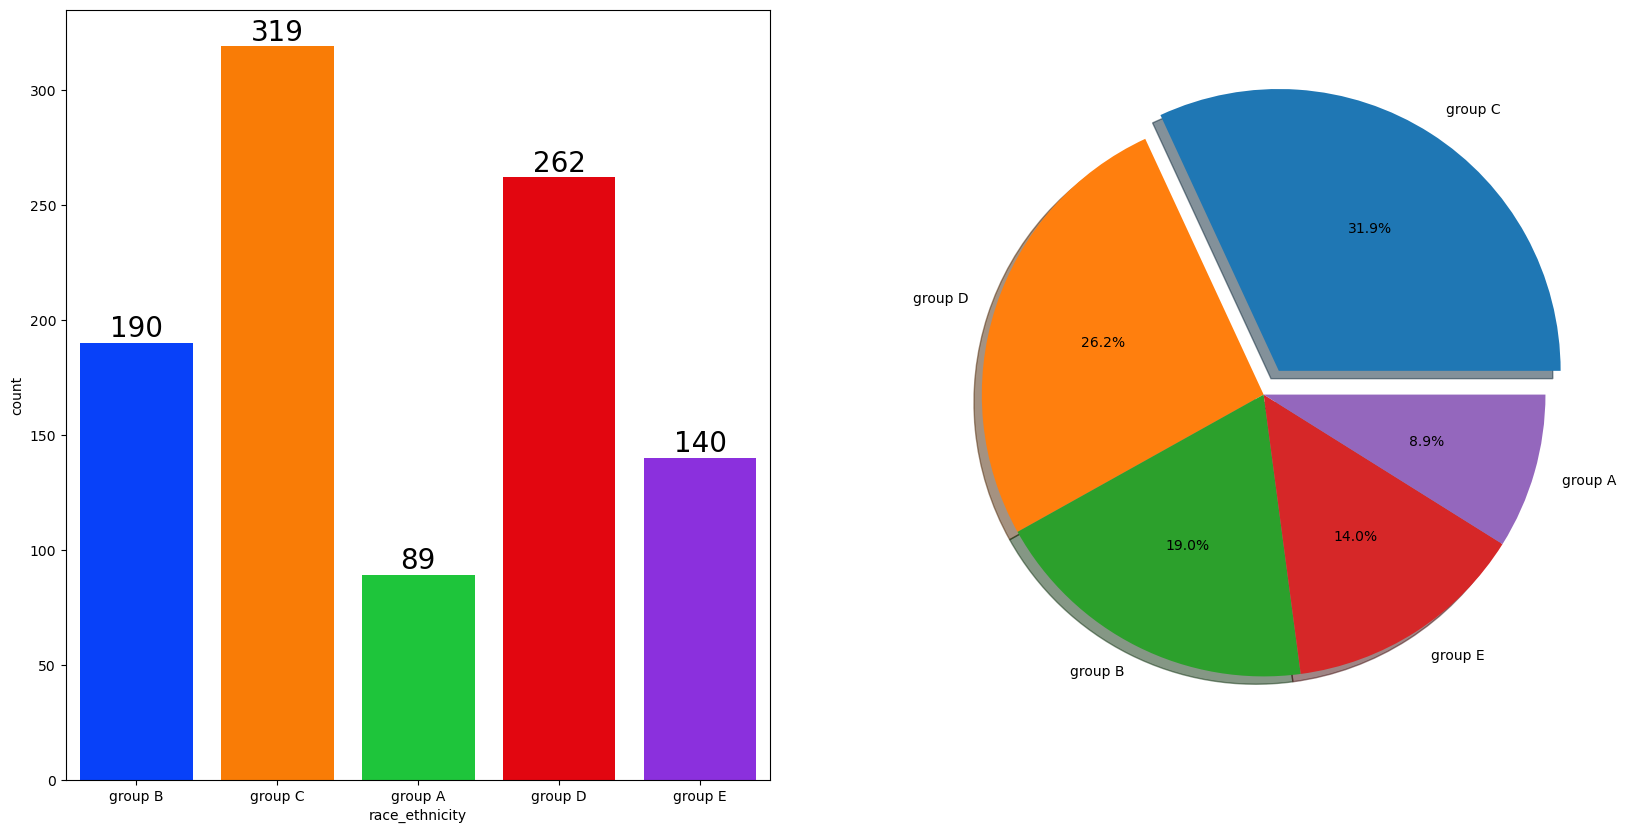

In [36]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)

plt.show()

# Insights
  -    Most of the student belonging from group C /group D.
  -    Lowest number of students belong to groupA.

# Bivariant Analysis


In [37]:
group_data2 = df.groupby('race_ethnicity').mean()
group_data2

C:\Users\NADIR\AppData\Local\Temp\ipykernel_15056\1072615471.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data2 = df.groupby('race_ethnicity').mean()


,math_score,reading_score,writing_score,total_score,avg_score
race_ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


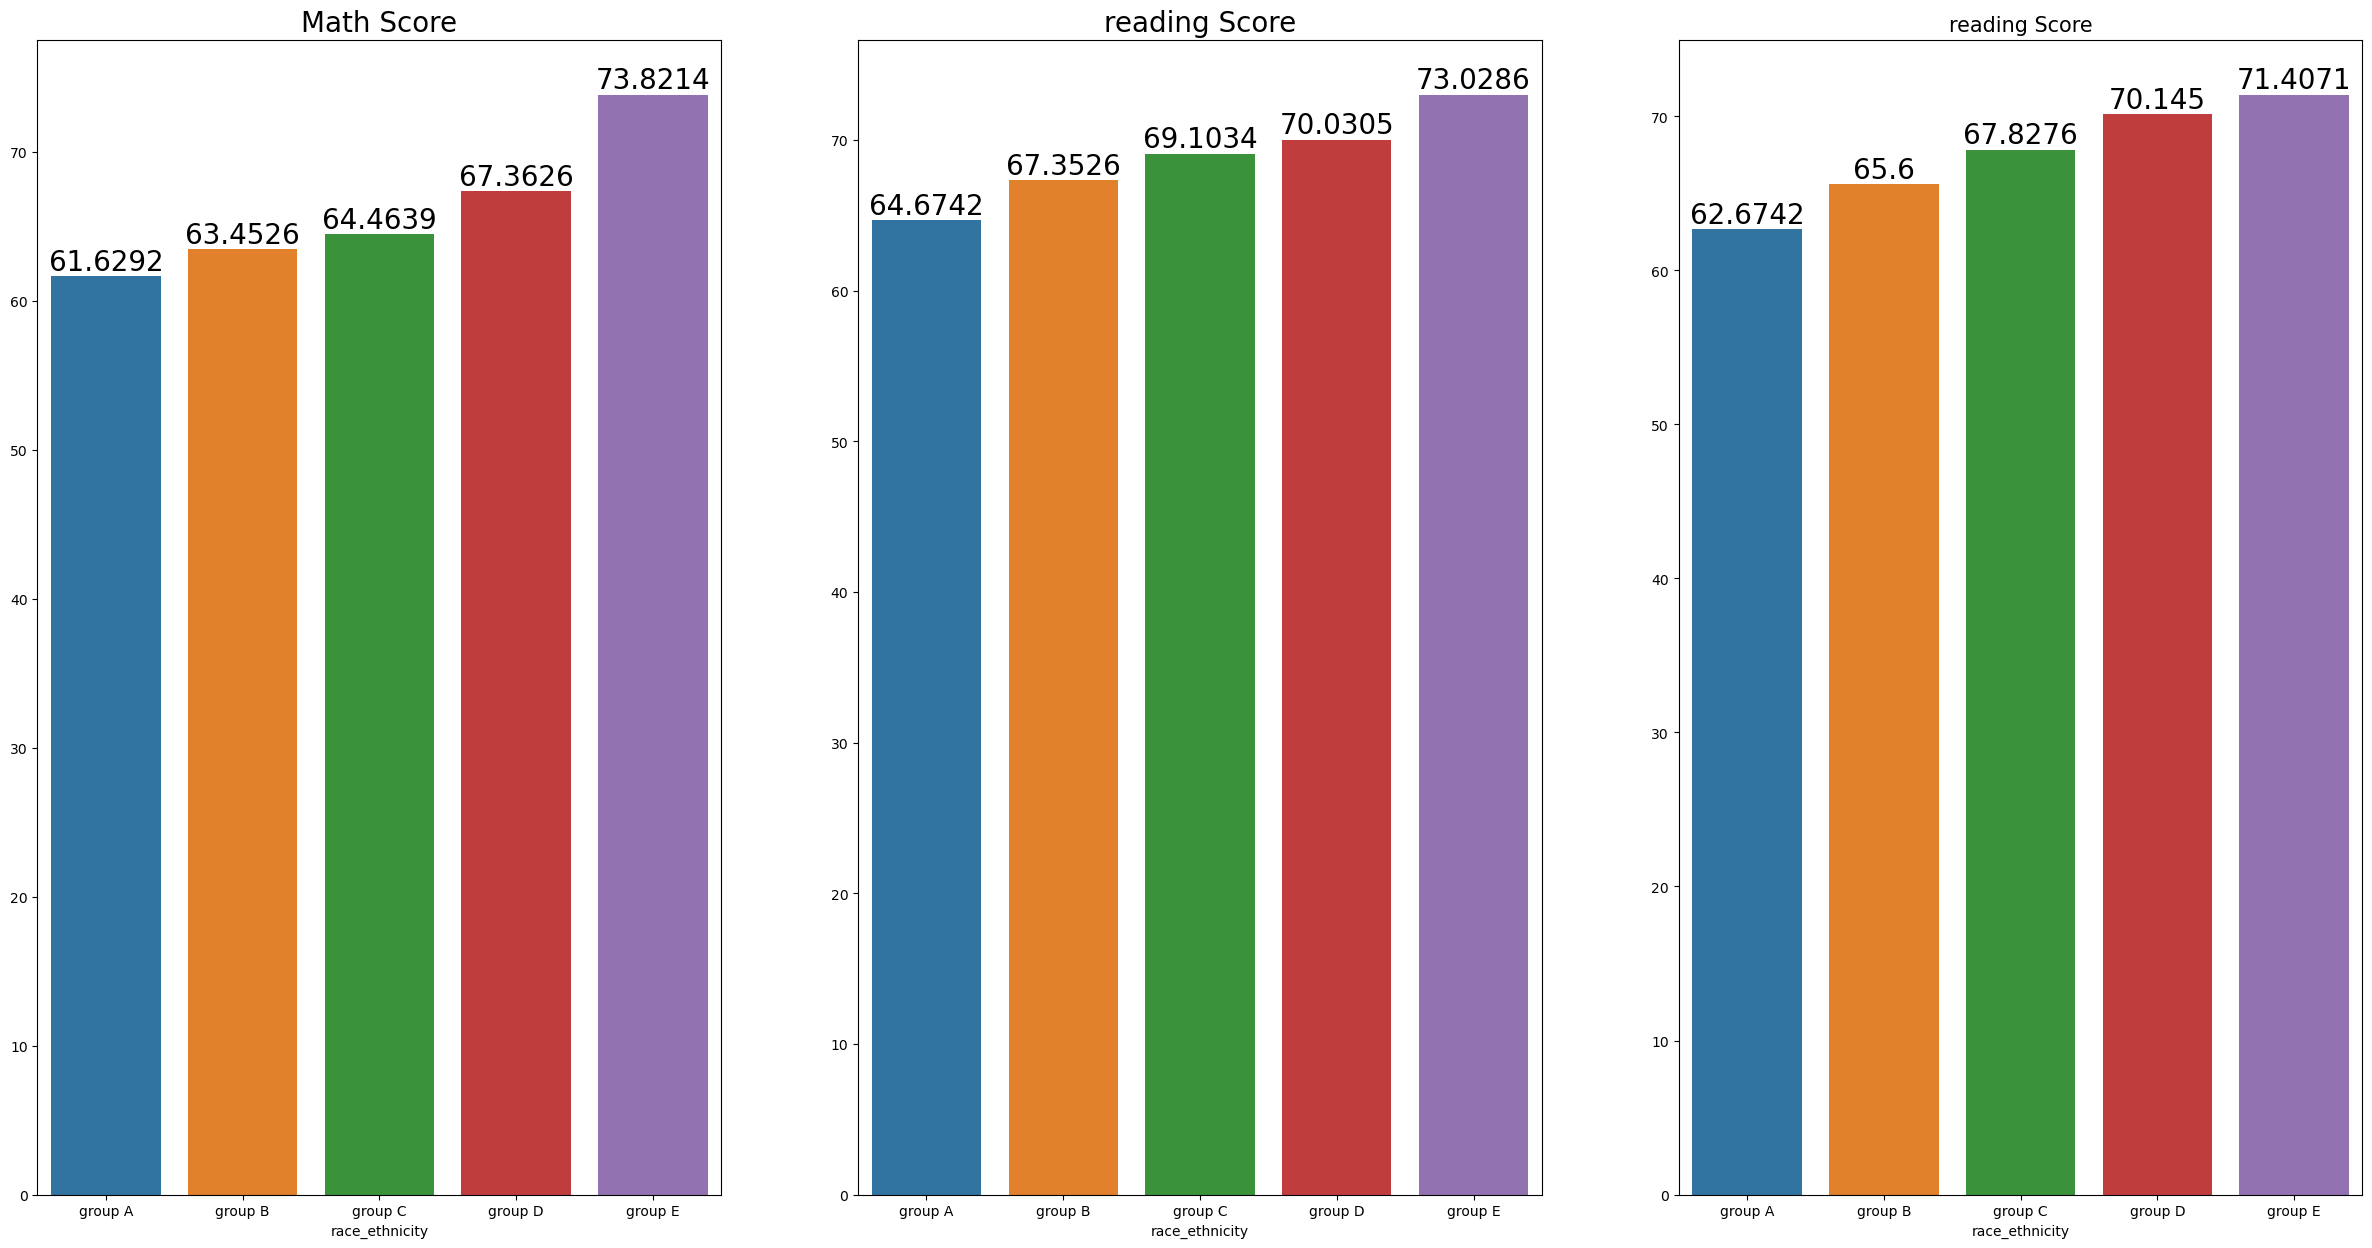

In [38]:
f,ax = plt.subplots(1,3,figsize = (30,15))
sns.barplot(x = group_data2['math_score'].index,y = group_data2['math_score'].values,ax = ax[0])
ax[0].set_title('Math Score',size = 20)

for container in ax[0].containers:
    ax[0].bar_label(container,color = 'black', size = 20)
    

sns.barplot(x = group_data2['reading_score'].index,y = group_data2['reading_score'].values,ax = ax[1])
ax[1].set_title('reading Score',size = 20)

for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 20)
    
    
sns.barplot(x = group_data2['writing_score'].index, y = group_data2['writing_score'].values,ax = ax[2])
ax[2].set_title('reading Score',size = 15)

for container in ax[2].containers:
    ax[2].bar_label(container,color = 'black', size = 20)
    
plt.show()

# Insights
-    Group E students have scored the highest marks.
-    Group A students have scored the lowest marks.
-    Students from a lower Socioeconomic status have a lower avg in all course subjects

# parental_level_of_education

# Univariant

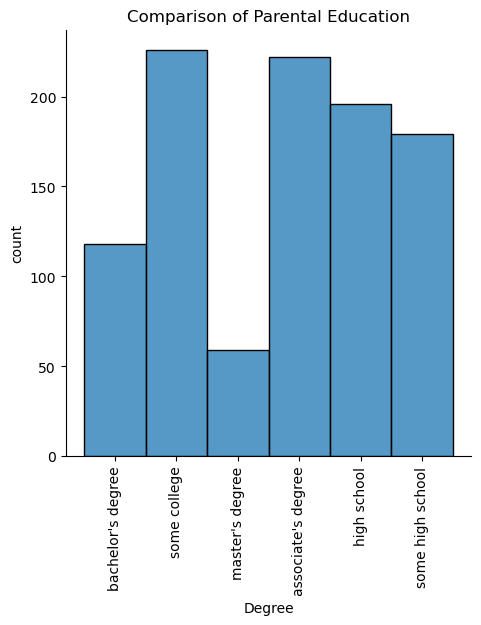

In [39]:
sns.displot(x = df['parental_level_of_education'],kind = 'hist')
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('count')
plt.xticks(rotation = 'vertical')
plt.show()

# Insights
-   Largest number of parents are from some college.

# Bivariant Analysis

C:\Users\NADIR\AppData\Local\Temp\ipykernel_15056\1949116641.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('parental_level_of_education').mean().plot(kind = 'barh')


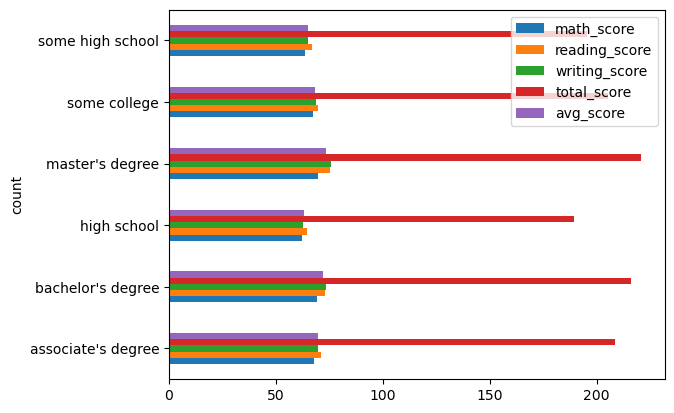

In [40]:
df.groupby('parental_level_of_education').mean().plot(kind = 'barh')
plt.ylabel('count')
plt.show()

# Insights
-   The score of student whose parents possess master and bachelor level education are higher than others.

# lunch

# Univariant

Text(4.944444444444445, 0.5, 'count')

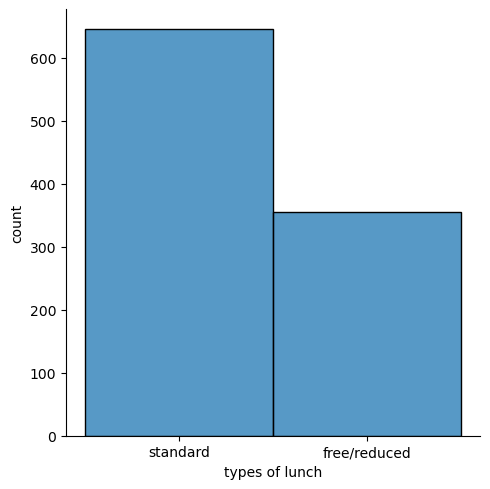

In [41]:
sns.displot(x = df['lunch'],kind = 'hist',data = df)
plt.xlabel('types of lunch')
plt.ylabel('count')

# Insights
-   Students being served Standard lunch was more than free lunch

# Bivariant Analysis

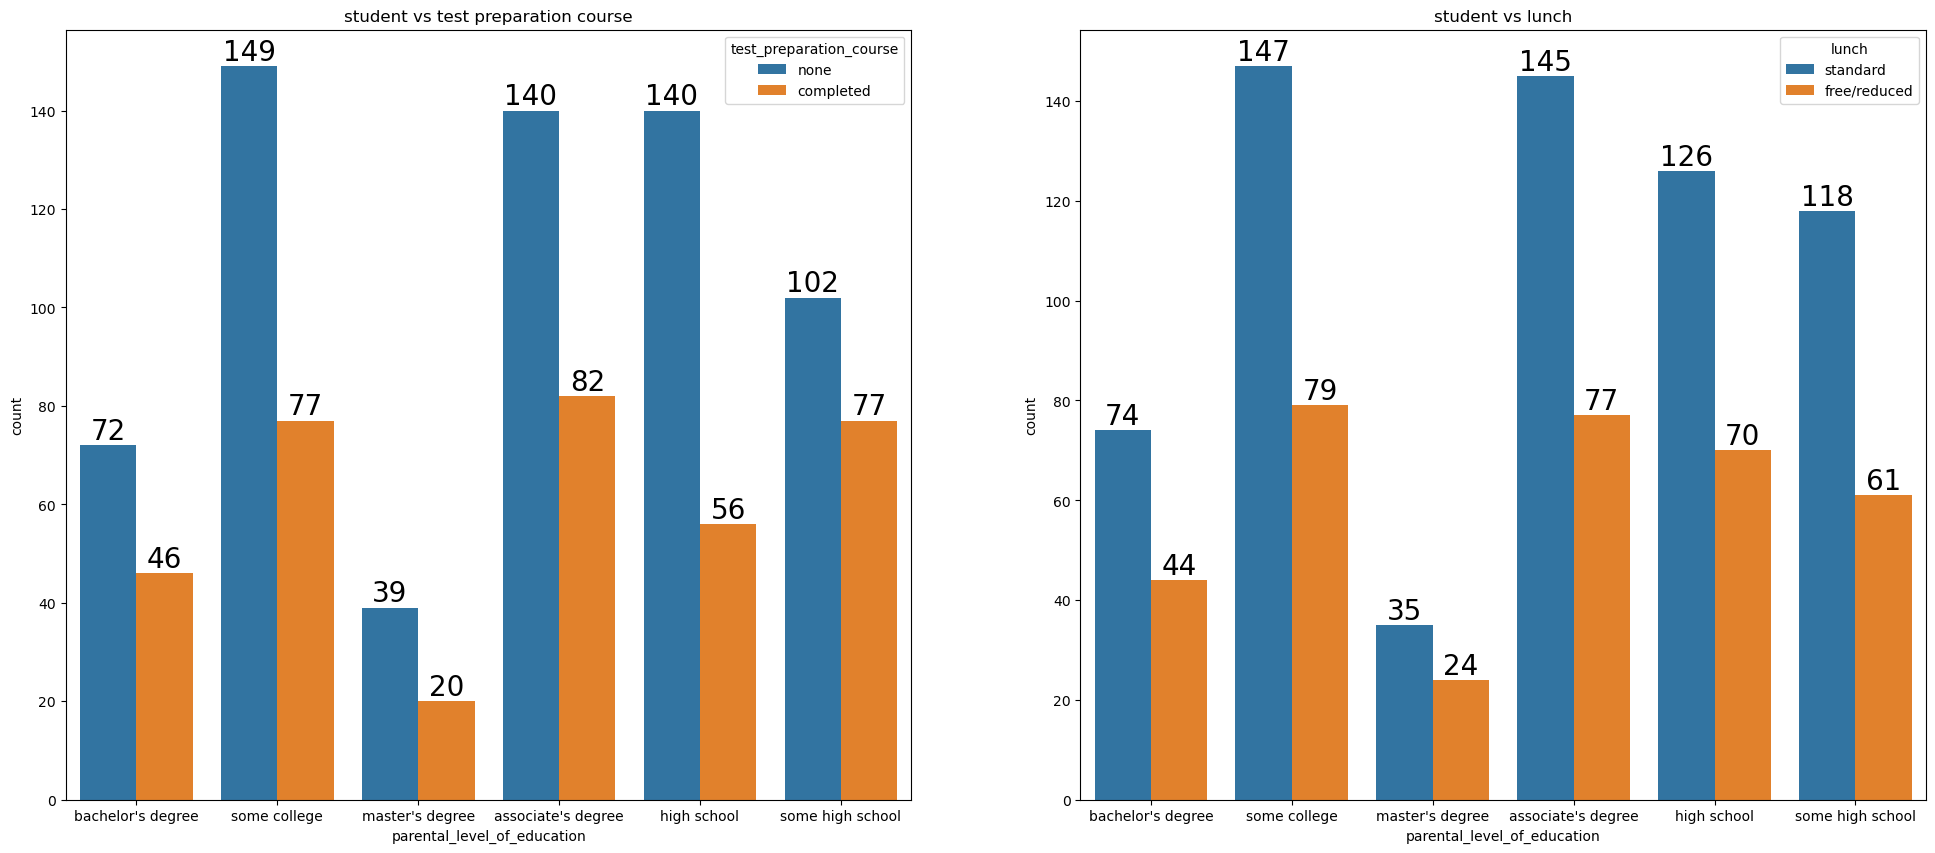

In [42]:
f, ax = plt.subplots(1,2,figsize = (24,10))

sns.countplot(x = df['parental_level_of_education'],data =df,hue = 'test_preparation_course',ax = ax[0])
ax[0].set_title('student vs test preparation course')


for container in ax[0].containers:
    ax[0].bar_label(container,color = 'black',size = 20)
    
    
sns.countplot(x = df['parental_level_of_education'],data =df,hue = 'lunch',ax = ax[1])
ax[1].set_title('student vs lunch')


for container in ax[1].containers:
    ax[1].bar_label(container,color = 'black',size = 20)
    
    
    


# Insights
-   Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

# test_preparation_course

# Bivariant Analysis

C:\Users\NADIR\AppData\Local\Temp\ipykernel_15056\3322742498.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


Text(0.5, 0, 'types of lunch')

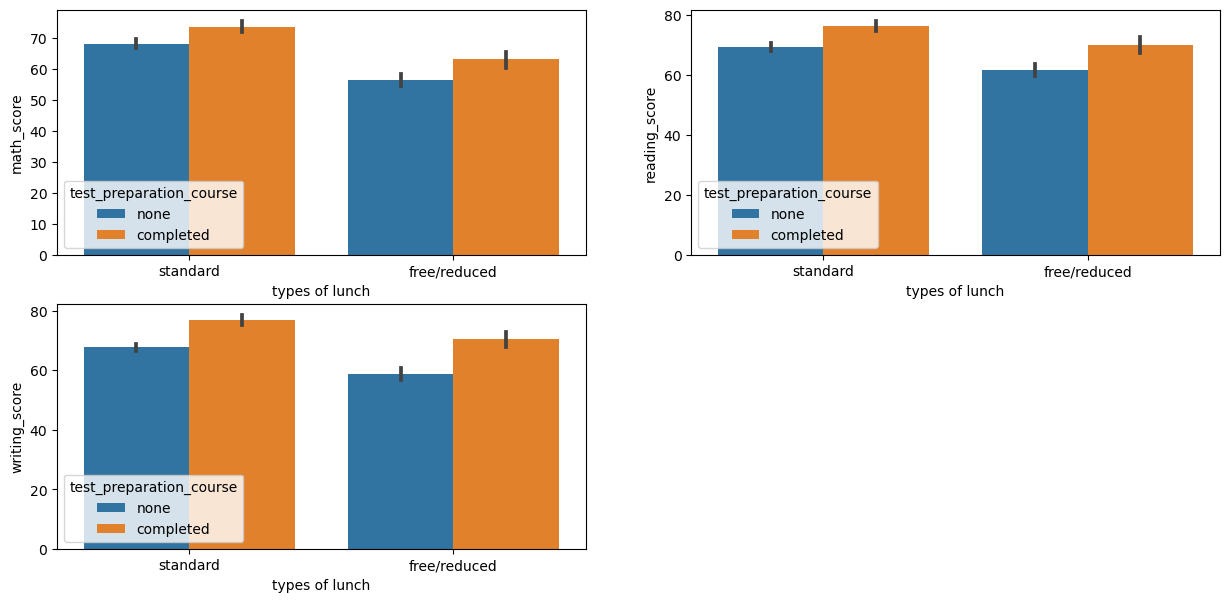

In [43]:
plt.subplots(figsize = (15,7))

plt.subplot(2,2,1)
sns.barplot(x = df['lunch'], y = df['math_score'],hue = df['test_preparation_course'])
plt.xlabel('types of lunch')

plt.subplot(2,2,2)
sns.barplot(x = df['lunch'], y = df['reading_score'],hue = df['test_preparation_course'])
plt.xlabel('types of lunch')

plt.subplot(2,2,3)
sns.barplot(x = df['lunch'], y = df['writing_score'],hue = df['test_preparation_course'])
plt.xlabel('types of lunch')

# insights 
-    Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

# Outlier Detection

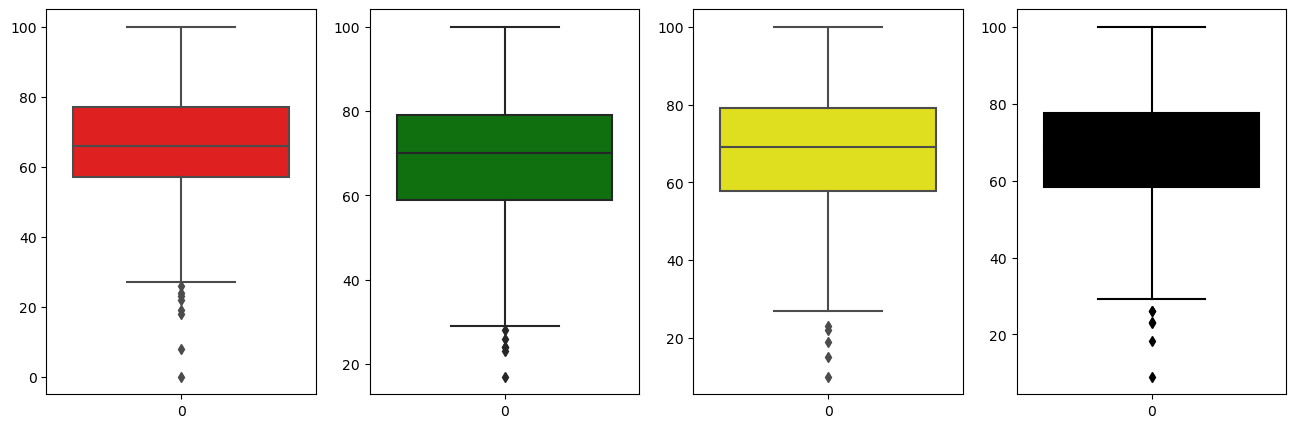

In [44]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='red')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='green')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['avg_score'],color='black')
plt.show()

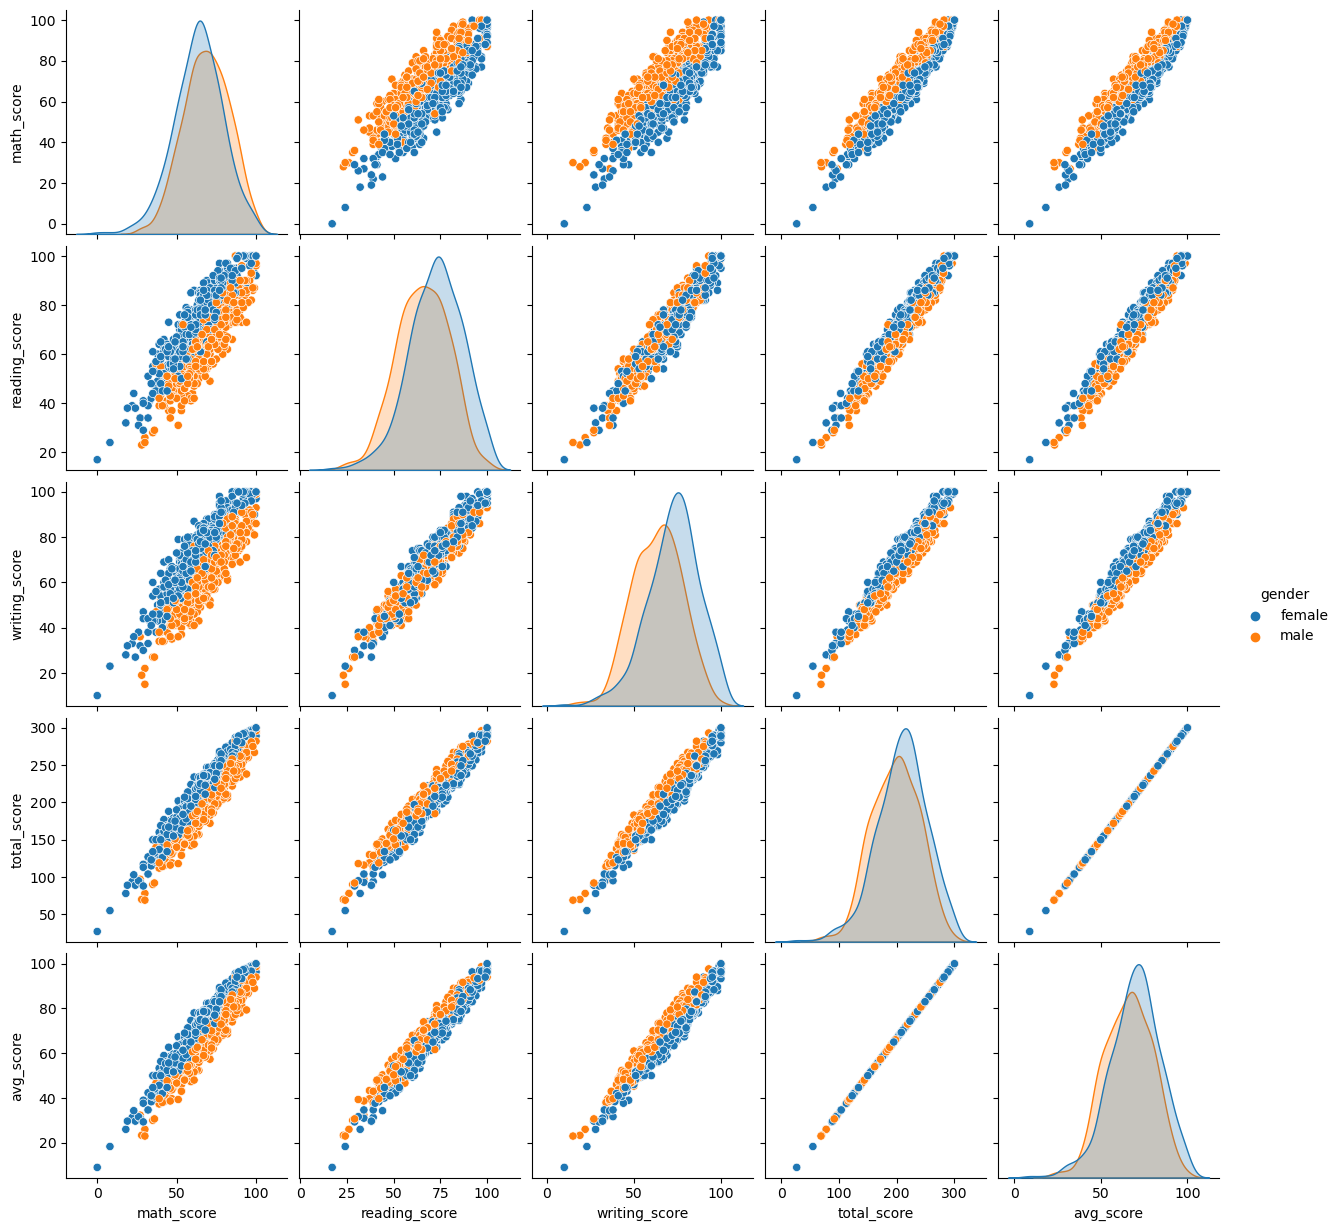

In [45]:
sns.pairplot(df,hue = 'gender')
plt.show()

# Insights
-    From the above plot it is clear that all the scores increase linearly with each other.

# Conclusions
-   Student's Performance is related with lunch, race, parental level education
-   Females lead in pass percentage and also are top-scorers
-   Student's Performance is not much related with test preparation course
-   Finishing preparation course is benefitial.

# Model Training

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

# Dividing the data into X and Y Variables

In [47]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [48]:
X = df.drop(columns = ['math_score'], axis = 1)

In [49]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,74,218,72.666667
1,female,group C,some college,standard,completed,90,88,247,82.333333
2,female,group B,master's degree,standard,none,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,57,44,148,49.333333
4,male,group C,some college,standard,none,78,75,229,76.333333


In [50]:
y = df['math_score']

print(y)

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64


In [51]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [52]:
X = preprocessor.fit_transform(X)

In [53]:
X.shape

(1000, 21)

In [54]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 21), (200, 21))

# Create an Evaluate Function to give all metrics after model Training

In [55]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [56]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.7381
- Mean Absolute Error: 3.7439
- R2 Score: 0.9004
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.7171
- Mean Absolute Error: 3.7579
- R2 Score: 0.9086


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3396
- Mean Absolute Error: 0.2724
- R2 Score: 0.9995
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3432
- Mean Absolute Error: 0.2684
- R2 Score: 0.9995


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.2791
- Mean Absolute Error: 3.3838
- R2 Score: 0.9188
-----------------------

# Result

In [57]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,0.999516
5,Random Forest Regressor,0.963643
4,Decision Tree,0.936940
6,AdaBoost Regressor,0.928614
1,Lasso,0.908560
3,K-Neighbors Regressor,0.889781


# Linear Regression

In [58]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


# Plot y_pred and y_test

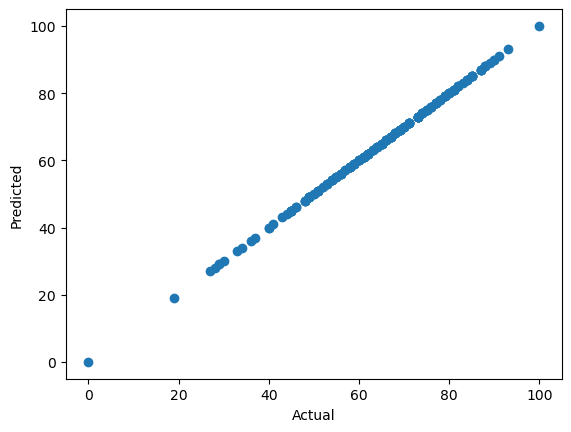

In [59]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

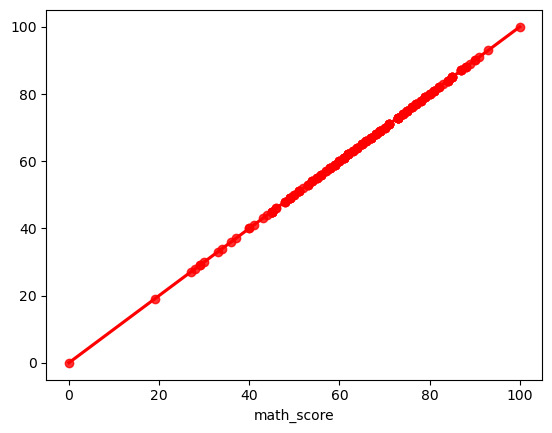

In [60]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

# Difference between Actual and Predicted Values

In [61]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,91.0,-2.131628e-13
737,53,53.0,2.131628e-14
740,80,80.0,-2.842171e-14
660,74,74.0,-7.105427e-14
411,84,84.0,-1.421085e-13
...,...,...,...
408,52,52.0,1.421085e-13
332,62,62.0,1.207923e-13
208,74,74.0,-8.526513e-14
613,65,65.0,-7.105427e-14


# Conclusions
-   Student's Performance is related with lunch, race, parental level education
-   Females lead in pass percentage and also are top-scorers
-   Student's Performance is not much related with test preparation course
-   Finishing preparation course is benefitial.
-   This data have no outlier.
-   this Data is Linearly Seperable.
-   The Actual Value & the Predicted Value is Same which means data have no errors.